<a href="https://colab.research.google.com/github/HanJaeHyeok23/DataMining/blob/master/two_moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
import numpy as np
import matplotlib.pyplot as plt
!pip install mglearn

import mglearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=7be0ad4770ecd0fdd3661627b646a44a4e77059b9cde13f00abb01b3f89df429
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
print("클러스터 레이블 확인 : \n {}".format(kmeans.labels_))


클러스터 레이블 확인 : 
 [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [ ]:
print(np.array_equal(kmeans.labels_,kmeans.predict(X)))

True


Text(0, 0.5, 'feature 2')

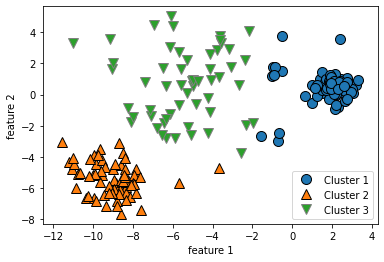

In [ ]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["Cluster 1", "Cluster 2", "Cluster 3"], loc='best')
plt.xlabel("feature 1")
plt.ylabel("feature 2")

Text(0, 0.5, 'feature 1')

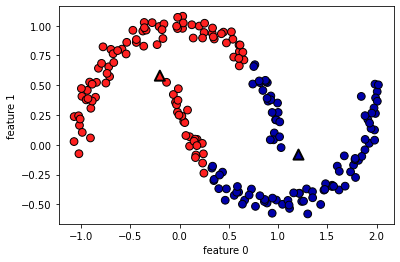

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 2')

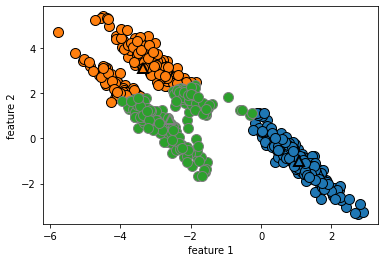

In [ ]:
# 무작위로 클러스터 데이터를 생성합니다.
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다.
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

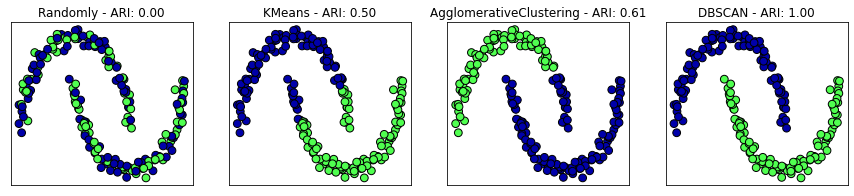

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듭니다
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("Randomly - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,  adjusted_rand_score(y, clusters)))

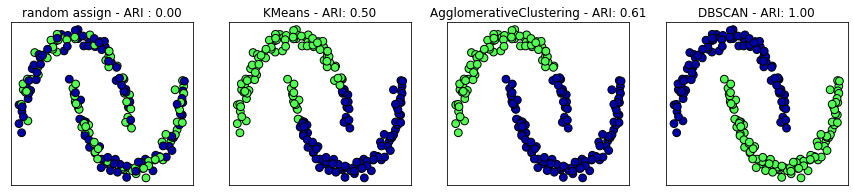

In [ ]:
# coding: utf-8
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np
import mglearn

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks':(), 'yticks':()})

# 3가지 알고리즘들 리스트
algos = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_cluster = random_state.randint(low=0, high=2, size=len(X))

# 무작위로 할당한 클러스터
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_cluster, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("random assign - ARI : {:.2f}".format(adjusted_rand_score(y, random_cluster)))

for ax, algo in zip(axes[1:], algos):
    clusters = algo.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algo.__class__.__name__, adjusted_rand_score(y, clusters)))
plt.show()


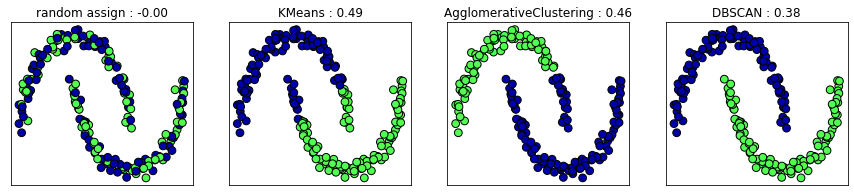

In [ ]:
from sklearn.datasets import make_moons #two-moons 가져오기
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import mglearn

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks':(), 'yticks':()})

# 3가지 알고리즘들 리스트
algos = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위로 할당한 클러스터
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("random assign : {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

for ax, algo in zip(axes[1:], algos):
    clusters = algo.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algo.__class__.__name__, silhouette_score(X_scaled, clusters)))
plt.show()


In [ ]:
# coding: utf-8
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지를 픽셀 값을 0~1 스케일로 조정
# MinMaxScaler 적용과 비슷
X_people = X_people / 255.

pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [ ]:
#dbscan으로 얼굴 dataset분석하기
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)

print("고유한 레이블 \n{}".format(np.unique(labels)))


고유한 레이블 
[-1]


In [ ]:
#min_samples=3 인 경우
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블 \n{}".format(np.unique(labels)))


고유한 레이블 
[-1]


In [ ]:
#min_samples=3, eps=15 인 경우
dbscan = DBSCAN(min_samples=3,eps=15)
labels = dbscan.fit_predict(X_pca)

print("고유한 레이블 \n{}".format(np.unique(labels)))


고유한 레이블 
[-1  0]


In [ ]:
# 잡음 포인트와 클러스터에 속한 포인트 수 세기
# bincount는 음수를 받을수 없어 +1을 한다.
print("클러스터 별 포인트 수: {}".format(np.bincount(labels + 1)))

# 고유한 레이블 
# [-1  0]
# 클러스터 별 포인트 수: [ 19 775]


클러스터 별 포인트 수: [  32 2031]


클러스터 별 포인트 수: [  32 2031]


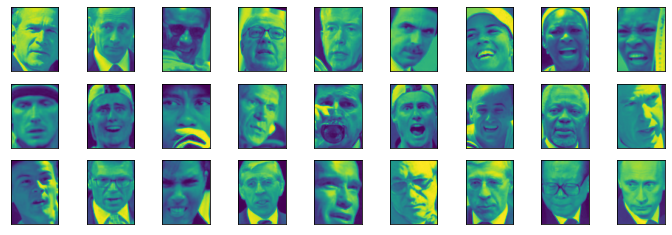

In [ ]:
# 잡음 포인트와 클러스터에 속한 포인트 수 세기
# bincount는 음수를 받을수 없어 +1을 한다.
print("클러스터 별 포인트 수: {}".format(np.bincount(labels + 1)))

noise = X_people[labels == -1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks':(), 'yticks':()}, figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)


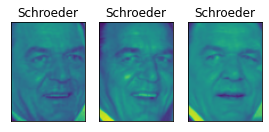

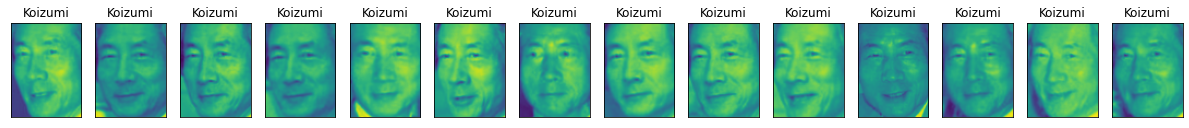

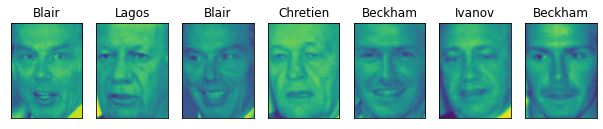

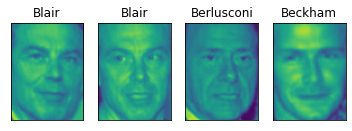

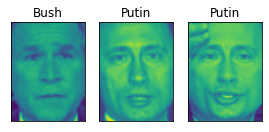

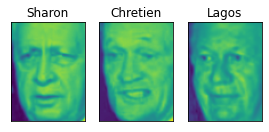

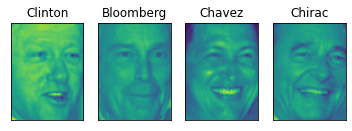

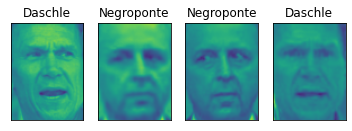

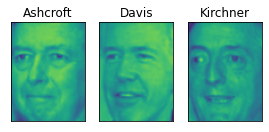

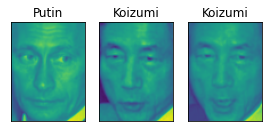

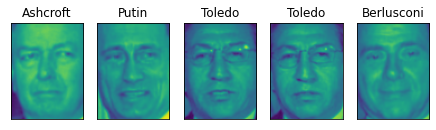

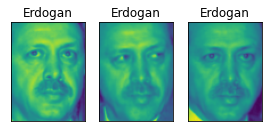

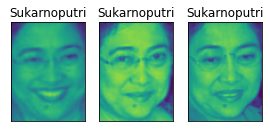

In [ ]:
dbscan = DBSCAN(min_samples=3,eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks':(), 'yticks':()})  

    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])


In [ ]:
#k-평균으로 얼굴 데이터셋 분석하기
from sklearn.cluster import KMeans

# k-평균으로 클러스터 추출
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)

print("k-평균의 클러스터 크기 : {}".format(np.bincount(labels_km)))
# k-평균의 클러스터 크기 : [ 24 100  47 125  63 116 102  74   8 135]


k-평균의 클러스터 크기 : [155 175 238  75 358 257  91 219 323 172]


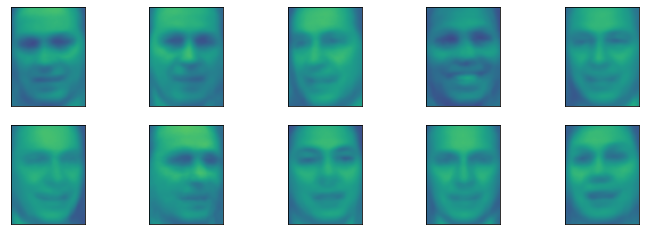

In [ ]:
#k-평균 클러스터 중심을 시각화 해보자.
fig, axes = plt.subplots(2, 5, figsize=(12, 4), subplot_kw={'xticks':(), 'yticks':()})  

for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)


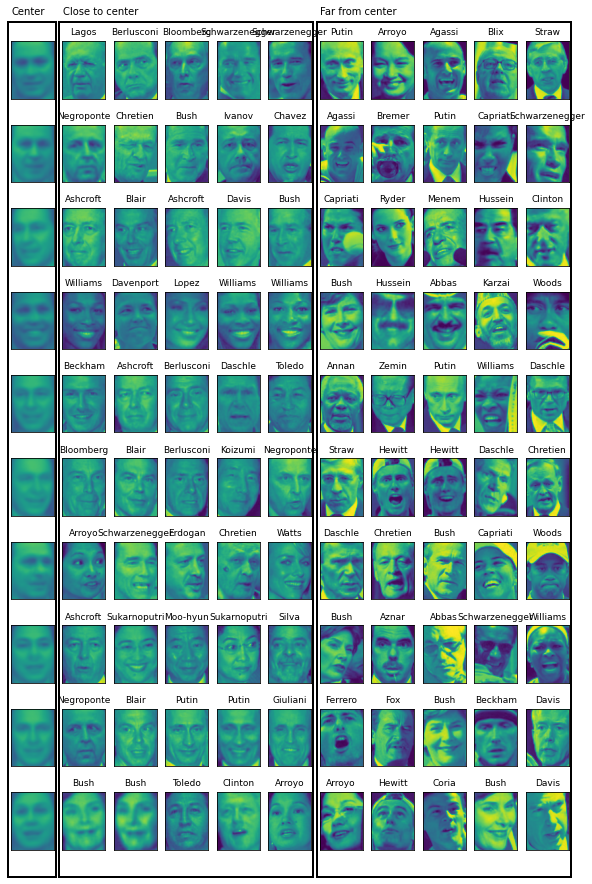

In [ ]:
#각 클러스터에서 가장 대표되는 이미지를 다섯개와 가장 먼 이미지 다섯개를 표현해보자.
import mglearn
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

In [ ]:
#병합군집으로 dataset비교하기
from sklearn.cluster import AgglomerativeClustering

# 병합 군집으로 클러스터 추출
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)

print("k-평균의 클러스터 크기 : {}".format(np.bincount(labels_agg)))
# 병합 군집의 클러스터 크기 : [116   8 119 153  50 197 108   1   4  38]


k-평균의 클러스터 크기 : [169 660 144 329 217  85  18 261  31 149]


In [ ]:
#ARI 점수를 이용해 병합 군집과 k-평균으로 만든 두 데이터가 비슷한지 측정해보자.
print("ARI : {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))
# ARI : 0.06

ARI : 0.09
